In [14]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# File Setup

Set the file path of where we will be taking the images from

In [15]:
datasetFile = 'Dataset/ASL.v3.zip'

Loading all of the images in the files and placing it into a dataframe object called data

In [16]:
filesNames = []
letter = []
with ZipFile(datasetFile) as zf:
    for file in zf.namelist():
        if file.endswith(".jpg") or file.endswith(".png"):
            
            if "MACOSX" not in file:
                filesNames.append(file)
                letter.append(file.split('/')[-2])
            
            
Filename = pd.DataFrame(filesNames, columns=['Filename'])
Letter = pd.DataFrame(letter, columns=['Letter'])

data = pd.concat([Filename, Letter], axis=1)

This is what the data looks like

In [17]:
data

,Filename,Letter
0,A/A25.jpg,A
1,A/A2286.jpg,A
2,A/A1957.jpg,A
3,A/A618.jpg,A
4,A/A1943.jpg,A
...,...,...
86995,Z/Z2784.jpg,Z
86996,Z/Z1299.jpg,Z
86997,Z/Z679.jpg,Z
86998,Z/Z2790.jpg,Z


Because a Nueral network cant understand letters we need to Hot Encode all of the letters to turn them into numbers.

So we create a column for each letter and if its that letter than we place a 1 in the cell otherwise we place a 0.

See below

In [18]:
labels_encoded = data['Letter'].str.get_dummies()

# Concatenate the new DataFrame with the original DataFrame
df_encoded = pd.concat([data, labels_encoded], axis=1)

This is what is looks like

In [19]:
df_encoded

,Filename,Letter,A,B,C,D,E,F,G,H,...,T,U,V,W,X,Y,Z,del,nothing,space
0,A/A25.jpg,A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A/A2286.jpg,A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A/A1957.jpg,A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A/A618.jpg,A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A/A1943.jpg,A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86995,Z/Z2784.jpg,Z,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
86996,Z/Z1299.jpg,Z,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
86997,Z/Z679.jpg,Z,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
86998,Z/Z2790.jpg,Z,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Splitting the data into Training, Test and Validation sets

Here we break down the hot encoded data into a training, test and validation split.

We use the split of:
- Training: 80%
- Test: 10%
- Validation: 10%

In [20]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary data
train_data, temp_data = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Split the temporary data into validation and test data
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of the datasets
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(valid_data)}")
print(f"Test set size: {len(test_data)}")

X_train = np.array(train_data['Filename'])
Y_train = np.array(train_data.drop(columns=['Filename', 'Letter']))

X_valid = np.array(valid_data['Filename'])
Y_valid = np.array(valid_data.drop(columns=['Filename', 'Letter']))

X_test = np.array(test_data['Filename'])
Y_test = np.array(test_data.drop(columns=['Filename', 'Letter']))

Training set size: 69600
Validation set size: 8700
Test set size: 8700


Here we double check the size of the split data. We are making sure that the X and Y have the same size in the first column as they need to be equal.

Secondly we are seeing the size of the number 29. This number represent the number of output neurons that we will see in the Neural network

In [21]:
print(X_train.shape)
print(Y_train.shape)

(69600,)
(69600, 29)


This is what the training data looks likes

NOTE: We still need to turn the FileName to an actual image, we will do this in the loading block of code

In [22]:
train_data.head()

,Filename,Letter,A,B,C,D,E,F,G,H,...,T,U,V,W,X,Y,Z,del,nothing,space
70493,U/U736.jpg,U,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33491,K/K2396.jpg,K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84832,Z/Z1427.jpg,Z,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34582,K/K1143.jpg,K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56777,Q/Q1954.jpg,Q,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_data.columns

Index(['Filename', 'Letter', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z', 'del', 'nothing', 'space'],
      dtype='object')

# Loading and Preprocessing Images

Here we apply 5 filters:
- Median filter for Salt and Pepper noise
- Gaussian Blurring for Gaussian noise
- Median filter for Uniform noise
- Resizing the image
- Normalize image to place all values of RGB between 0 and 1

In [23]:
def preprocessImage(img, imageSize):
    
    # Step 1: Median filter for Salt and Pepper noise
    salt_pepper_filtered = cv2.medianBlur(img, 3)  # Kernel size 3 (you can adjust based on noise level)
    
    # Step 2: Gaussian Blurring for Gaussian noise
    gaussian_filtered = cv2.GaussianBlur(salt_pepper_filtered, (5, 5), 0)  # Kernel size 5x5, standard deviation 0
    
    # Step 3: Median filter for Uniform noise
    uniform_filtered = cv2.medianBlur(gaussian_filtered, 3)  # Kernel size 3 (you can adjust based on noise level)
    
    # Step 4: Resize the image to be used in the AI Algorithm
    uniform_filtered = cv2.resize(uniform_filtered, imageSize)
    
    # Step: 5 Normalize image to place all values of RGB between 0 and 1
    normalized_filtered = uniform_filtered / 255.0 
    
    return normalized_filtered

Here we load in all of the images. We turn the filename column into an image column.

NOTE: The reason we use an image generator is because we want to load the images in segments as if we were to load in all the images at once the Memory / RAM on the PC would fill up causing the program to crash

In [36]:
# Define image size and batch size
img_size = (128, 128)  # Resize images to this size
batch_size = 128  # Define a batch size

# Custom generator to load images in batches from a zip file
def image_generator(file_list, label_list, zip_file, batch_size):
    while True:  # Loop indefinitely so the generator can be used in keras .fit()
        for start in range(0, len(file_list), batch_size):
            end = min(start + batch_size, len(file_list))
            batch_files = file_list[start:end]
            batch_labels = label_list[start:end]
            
            batch_images = []
            for file in batch_files:
                # Preprocess image
                with zip_file.open(file) as img_file:
                    img = cv2.imdecode(np.frombuffer(img_file.read(), np.uint8), cv2.IMREAD_COLOR)
                    if img is not None:
                        img = preprocessImage(img, img_size)

                        batch_images.append(img)
                    else:
                        print(f"Warning: Image {file} could not be loaded.")
            
            yield np.array(batch_images), np.array(batch_labels)

# Open the zip file once to use inside the generator
zip_file = ZipFile(datasetFile)

# Prepare data for the generator
X_train_files = np.array(train_data['Filename'])
Y_train_labels = np.array(train_data.drop(columns=['Filename', 'Letter']))

X_valid_files = np.array(valid_data['Filename'])
Y_valid_labels = np.array(valid_data.drop(columns=['Filename', 'Letter']))

# Create generators for training and validation
train_gen = image_generator(X_train_files, Y_train_labels, zip_file, batch_size)
valid_gen = image_generator(X_valid_files, Y_valid_labels, zip_file, batch_size)

# Calculate steps per epoch for training and validation
train_steps = len(X_train_files) // batch_size
valid_steps = len(X_valid_files) // batch_size


# CNN

Here we build a basic CNN architecture to do a classification of the images. 

NOTE: There are better models however we have chosen a more simple model to classify as we want the model to be faster when running 

In [37]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.callbacks import TensorBoard

# Define model architecture (same as before)
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=96, kernel_size=(11, 11), 
                              strides=(4, 4), activation="relu", 
                              input_shape=(128, 128, 3)))  # Adjust input shape
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(5, 5), 
                              strides=(1, 1), activation="relu", 
                              padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(keras.layers.Conv2D(filters=384, kernel_size=(3, 3), 
                              strides=(1, 1), activation="relu", 
                              padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=384, kernel_size=(3, 3), 
                              strides=(1, 1), activation="relu", 
                              padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3, 3), 
                              strides=(1, 1), activation="relu", 
                              padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(29, activation="softmax"))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Callbacks
checkpoint = ModelCheckpoint('best_model_CNN.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)

# Add the callbacks to a list
callbacks = [checkpoint, early_stopping, reduce_lr, tensorboard]

# Fit the model using the generators with callbacks
history = model.fit(
    train_gen, 
    steps_per_epoch=train_steps, 
    epochs=10, 
    validation_data=valid_gen, 
    validation_steps=valid_steps, 
    callbacks=callbacks
)


/Users/christopherarmenio/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-25 11:55:07.290 python[9555:2478837] +[IMKClient subclass]: chose IMKClient_Legacy
2024-09-25 11:55:07.290 python[9555:2478837] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [29]:
# Load the TensorBoard extension
%load_ext tensorboard

# Start TensorBoard and point it to the log directory
%tensorboard --logdir logs/train

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6010 (pid 11986), started 0:00:09 ago. (Use '!kill 11986' to kill it.)

<IPython.core.display.Javascript object>

Here we can see the training and test accuracy while the model is learning.

NOTE: When the training data goes about the test data it means that the model is starting to overfit. This is bad as it means the CNN will preform worse on unseen data

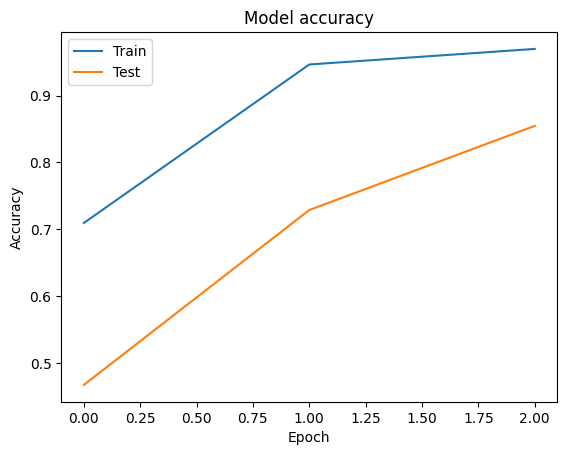

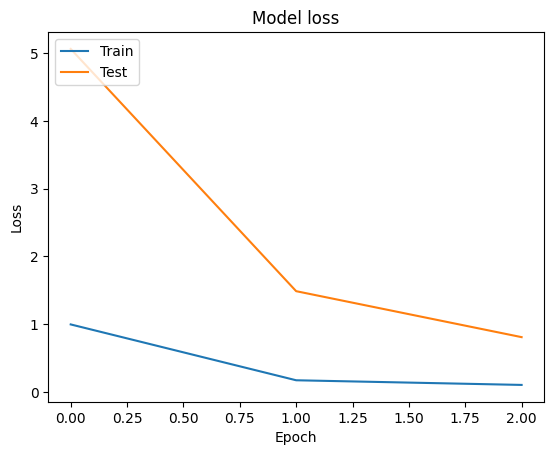

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# HOG

Here we create a basic function that extrapolates the hog features from an image.

Because HOG only works with one channel we split the RBG in septate channels and process each one individually. We then combine them all together and return that array. 

In [ ]:
from skimage.feature import hog

# Function to extract HOG features manually from each color channel
def extract_hog_features(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    hog_features = []
    for channel in range(image.shape[-1]):
        hog_channel_features, _ = hog(
            image[:, :, channel], 
            orientations=9, 
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block, 
            block_norm='L2-Hys', 
            visualize=True)
        hog_features.extend(hog_channel_features)
    return np.array(hog_features)


Here we restructure the image generator load in images and return the HOG Features.

NOTE: Only 1 line of code is added here

In [ ]:
# Updated image_generator with HOG extraction
def image_generator_Hog(file_list, label_list, zip_file, batch_size):
    while True:
        for start in range(0, len(file_list), batch_size):
            end = min(start + batch_size, len(file_list))
            batch_files = file_list[start:end]
            batch_labels = label_list[start:end]
            
            batch_images = []
            for file in batch_files:
                with zip_file.open(file) as img_file:
                    img = cv2.imdecode(np.frombuffer(img_file.read(), np.uint8), 
                                       cv2.IMREAD_COLOR)
                    if img is not None:
                        img = preprocessImage(img, img_size)
                        
                        # ------------- New Line of Code -------------
                        img = extract_hog_features(img)

                        batch_images.append(img)
                    else:
                        print(f"Warning: Image {file} could not be loaded.")
            
            yield np.array(batch_images), np.array(batch_labels)


Here we build a basic Neural Network which can determine what the image is

In [ ]:
# Define model architecture for HOG features
model_hog = Sequential([
    Dense(512, activation="relu", input_shape=(24300,)),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(29, activation="softmax")
])

# Compile the model
model_hog.compile(loss='categorical_crossentropy', metrics=['accuracy'], 
                  optimizer='adam')


Here we are just training the HOG AI

In [ ]:
# Create generators for training and validation with HOG features
train_gen_hog = image_generator_Hog(X_train_files, Y_train_labels, zip_file, 
                                batch_size)
valid_gen_hog = image_generator_Hog(X_valid_files, Y_valid_labels, zip_file, 
                                batch_size)

checkpoint = ModelCheckpoint('best_model_HOG.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Add the callbacks to a list
callbacks = [checkpoint, early_stopping, reduce_lr, tensorboard]

# Fit the model with HOG features
history_hog = model_hog.fit(
    train_gen_hog, 
    steps_per_epoch=train_steps, 
    epochs=10, 
    validation_data=valid_gen_hog, 
    validation_steps=valid_steps, 
    callbacks=callbacks
)


Epoch 1/3
 309/1087 ━━━━━━━━━━━━━━━━━━━━ 23:45 2s/step - accuracy: 0.0857 - loss: 3.3641

KeyboardInterrupt: 

# SIFT

In [ ]:
import cv2
import numpy as np

# Function to extract SIFT features from an image
def extract_sift_features(image):
    sift = cv2.SIFT_create()

    # Convert image to grayscale if it’s RGB
    if len(image.shape) == 3 and image.shape[-1] == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)

    # If no keypoints detected, return a zero array of fixed size
    if descriptors is None:
        return np.zeros(128)

    # Flatten descriptors to create a feature vector
    return descriptors.flatten()[:128]  # Limit the size if needed


In [ ]:
# Updated image_generator with HOG extraction
def image_generator_SIFT(file_list, label_list, zip_file, batch_size):
    while True:
        for start in range(0, len(file_list), batch_size):
            end = min(start + batch_size, len(file_list))
            batch_files = file_list[start:end]
            batch_labels = label_list[start:end]
            
            batch_images = []
            for file in batch_files:
                with zip_file.open(file) as img_file:
                    img = cv2.imdecode(np.frombuffer(img_file.read(), np.uint8), 
                                       cv2.IMREAD_COLOR)
                    if img is not None:
                        img = preprocessImage(img, img_size)
                        
                        # ------------- New Line of Code -------------
                        img = extract_sift_features(img)

                        batch_images.append(img)
                    else:
                        print(f"Warning: Image {file} could not be loaded.")
            
            yield np.array(batch_images), np.array(batch_labels)


In [ ]:
# Define model architecture for HOG features
model_SIFT = Sequential([
    Dense(512, activation="relu", input_shape=(128,)),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(29, activation="softmax")
])

# Compile the model
model_SIFT.compile(loss='categorical_crossentropy', metrics=['accuracy'], 
                  optimizer='adam')


In [ ]:
train_gen_sift = image_generator_SIFT(X_train_files, Y_train_labels, zip_file, 
                                 batch_size)
valid_gen_sift = image_generator_SIFT(X_valid_files, Y_valid_labels, zip_file, 
                                 batch_size)

checkpoint = ModelCheckpoint('best_model_SIFT.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Add the callbacks to a list
callbacks = [checkpoint, early_stopping, reduce_lr, tensorboard]

# Fit the model with SIFT features
history_sift = model_SIFT.fit(
    train_gen_sift, 
    steps_per_epoch=train_steps, 
    epochs=10, 
    validation_data=valid_gen_sift, 
    validation_steps=valid_steps, 
    callbacks=callbacks
)


Epoch 1/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.0334 - loss: 12.1646
Epoch 1: val_loss did not improve from 0.80786
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 162s 148ms/step - accuracy: 0.0334 - loss: 12.1582 - val_accuracy: 0.0341 - val_loss: 3.3688 - learning_rate: 0.0010
Epoch 2/10
 258/1087 ━━━━━━━━━━━━━━━━━━━━ 1:50 133ms/step - accuracy: 0.0317 - loss: 3.3724

KeyboardInterrupt: 